# model1~6 acc_by_class graph

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 476/476 [00:58<00:00,  8.15it/s]



Test set Accuracy: 289/476 (60.7143%)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 662/662 [01:18<00:00,  8.49it/s]



Test set Accuracy: 324/662 (48.9426%)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 718/718 [01:24<00:00,  8.48it/s]



Test set Accuracy: 461/718 (64.2061%)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 394/394 [00:46<00:00,  8.49it/s]



Test set Accuracy: 281/394 (71.3198%)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 620/620 [01:13<00:00,  8.43it/s]



Test set Accuracy: 370/620 (59.6774%)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 1154/1154 [02:15<00:00,  8.53it/s]


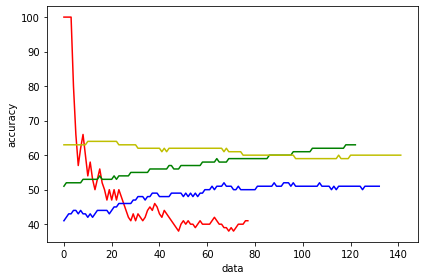

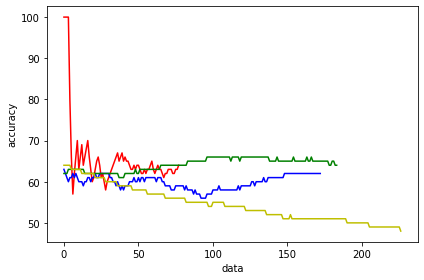

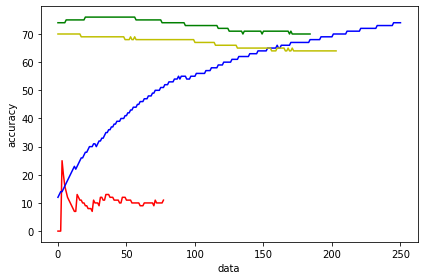

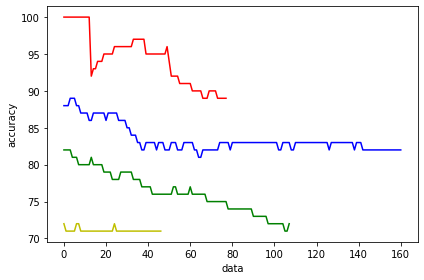

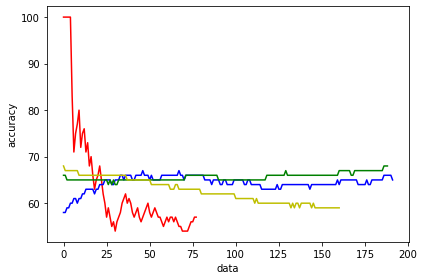

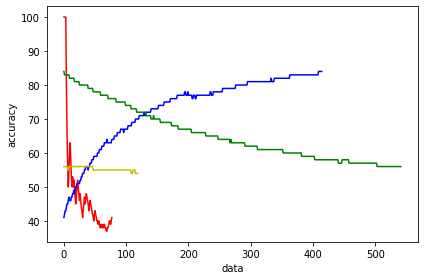


Test set Accuracy: 633/1154 (54.8527%)



In [ ]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
!pip install efficientnet_pytorch
import torchvision
from torchvision import transforms
import os
from torch.utils.data import Dataset,DataLoader
import torch
#모델경로
PATH = '/content/drive/MyDrive/project/scalp_weights/'+'aram_model1.pt'   # aram_model6.pt 모델파일 이름 바꿔주기 
#Cuda
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # CUDA (Computed Unified Device Architecture)는 NVIDIA에서 개발한 GPU 개발 툴이다.
#model = model.to(device) # inputs = inputs.to(device) # labels = labels.to(device) # outputs = model(inputs) # 아웃풋 = 모델에디바이스(인풋에디바이스)
#torch.cuda.device(device) : 선택된 장치를 변경하는 context 관리자
#torch.cuda.device 의 파라미터 : device ( torch.device 또는 int ) – 선택할 장치 인덱스, 인수가 음의 정수 또는 None이면 작동X(no-op)
model = torch.load(PATH, map_location=device)
#전처리-트랜스폼 규칙 선언 # model1_train 코드의 validation set 의 트랜스폼 규칙과 동일하게 함
transforms_test = transforms.Compose([                                         # interpolation 보간법 (두점을궤적으로연결하는방법, 알려진 지점 사이의 중간값을 추정하는 방법)
                                        transforms.Resize([int(600), int(600)], interpolation=transforms.InterpolationMode.BOX), 
        #리사이즈할 때 이미지품질에 관여한다
    #InterpolationMode.NEAREST: 0,    최저품질 (디폴트)
    #InterpolationMode.LANCZOS: 1,
    #InterpolationMode.BILINEAR: 2,
    #InterpolationMode.BICUBIC: 3,
    #InterpolationMode.BOX: 4,
    #InterpolationMode.HAMMING: 5     최고품질
        #예를 들어, 어떤 사람이 20살일때 키와 40살에서의 키를 보고 30살에서의 키를 추측하는 것은 interpolation이고 
        #과거 1살때부터 현재 나이까지의 키를 보고 앞으로 10년 후의 키를 예측하는 것은 extrapolation이다. 
        #또한 최근 한달간의 주가 동향을 보고 내일의 주가를 예측하는 것도 extrapolation이며 extrapolation은 
        #interpolation에 비해 훨씬 안정성이 떨어지는 (위험한) 예측 방법이다.
                                        transforms.ToTensor(), #텐서화
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #노말라이즈 정규화
                                      ])
#root 경로 폴더 속 jpg를 전처리, 텐서화 (rood 속에 폴더를 하나 더 만들어서 jpg를 묶어야 함)
testset = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/project/sample/model1sample' ,
                    transform = transforms_test)
#DataLoader를 통해 네트워크에 올리기
from torch.utils.data import Dataset,DataLoader
testloader = DataLoader(testset, batch_size=1, shuffle=False, num_workers=0)
    #데이터 로더는 데이터의 대량 가져오기 또는 내보내기를 위한 클라이언트 응용 프로그램 
    #for data, target in testloader: 에서 data는 데이터의 특징  target은 데이터의 정답값
    ##아웃풋, 로스, 프레딕, 아큐러시
#output_list = []
model.eval() # 평가모드로 전환 # 평가모드와 학습모드의 layer 구성이 다르다
#로스 연산을 위한
import torch.nn.functional as F   # F : 테스트_로스 연산 함수
from tqdm import tqdm # 진행률 표시를 위한 
def aaa() :
    with torch.no_grad(): # 평가할 땐  gradient를 backpropagation 하지 않기 때문에 no grad로 gradient 계산을 막아서 연산 속도를 높인다
            ######
            test_acc_0 = []
            test_acc_1 = []
            test_acc_2 = []
            test_acc_3 = []
            count = 0 # 반복수카운트
            #test_loss = 0
            global correct
            correct = 0
            ######
            for data, target in tqdm(testloader):                                   
                data, target  = data.to(device), target.to(device) 
                output = model(data)   # model1에 데이터를 넣어서 아웃풋 > [a,b,c,d] 각 0,1,2,3 의 확률값 리턴 가장 큰 것이 pred
                #output_list.append(output);
                #test_loss += F.nll_loss(output, target, reduction = 'sum').item()  # test_loss변수에 각 로스를 축적
                pred = output.argmax(dim=1, keepdim=True) # argmax : 리스트에서 최댓값의 인덱스를 뽑아줌 > y값아웃풋인덱
                correct += pred.eq(target.view_as(pred)).sum().item() # accuracy 측정을 위한 변수 # 각 예측이 맞았는지 틀렸는지 correct변수에 축적 맞을 때마다 +1  # # view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  pred.eq(data) : pred와 data가 일치하는지 검사
            ################################
                count += 1
                #모델1샘플파일수 (0,78) (1,133) (2,123) (3,142) 총476
                if count <= 78 :
                    test_acc_0.append( int(( correct / count ) * 100 ) ) # 반복/테스트데이터수별 아큐러시 # ( correct /
                elif count <= 211:
                    test_acc_1.append( int(( correct / count ) * 100 ) )
                elif count <= 334:
                    test_acc_2.append( int(( correct / count ) * 100 ) )
                else  :
                    test_acc_3.append( int(( correct / count ) * 100 ) )
                ##에폭별 아큐러시 그래프 그리기
                #print('best model : %d - %1.f / %.1f'%(best_idx, val_acc[best_idx], val_loss[best_idx]))
    import matplotlib.pyplot as plt
    fig, ax1 = plt.subplots()
    #ax1.plot(train_acc, 'b-') #선그래프Y축
    #ax1.plot(val_acc, 'r-') #선그래프Y축
    ax1.plot(test_acc_0 , 'r-') 
    ax1.plot(test_acc_1 , 'b-')
    ax1.plot(test_acc_2 , 'g-')
    ax1.plot(test_acc_3 , 'y-')
    #plt.plot(best_idx, val_acc[best_idx], 'ro') #벨리셋 아큐러시 최대치 나오는 지점을 점 찍어주기
    ax1.set_xlabel('data')
    #Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('accuracy', color='k')
    ax1.tick_params('y', colors='k')
    #ax2 = ax1.twinx()
    #ax2.plot(train_loss, 'g-')
    #ax2.plot(val_loss, 'k-')
    #plt.plot(best_idx, val_loss[best_idx], 'ro')
    #ax2.set_ylabel('loss', color='k')
    #ax2.tick_params('y', colors='k')
    fig.tight_layout()
  #  plt.show() #그래프 출력
        ################################
    return output, count, pred,  correct , test_acc_0 , test_acc_1, test_acc_2, test_acc_3
#view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다.
#test_loss /= len(testloader.dataset)  # 로스축적된 로스를 데이터 수(경로안jpg수)로 나누기
#아큐러시 출력 ( :.4f 소수점반올림 )
#print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값
#로스, 아큐러시 출력
#print('\nTest set: Average Loss: {:.4f}, Accuracy: {}/{} ({:.4f}%)\n'.format(test_loss, correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))
aaa()
print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값

########################################################



############################

#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
!pip install efficientnet_pytorch
import torchvision
from torchvision import transforms
import os
from torch.utils.data import Dataset,DataLoader
import torch
#모델경로
PATH = '/content/drive/MyDrive/project/scalp_weights/'+'aram_model2.pt'   # aram_model6.pt 모델파일 이름 바꿔주기 
#Cuda
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # CUDA (Computed Unified Device Architecture)는 NVIDIA에서 개발한 GPU 개발 툴이다.
#model = model.to(device) # inputs = inputs.to(device) # labels = labels.to(device) # outputs = model(inputs) # 아웃풋 = 모델에디바이스(인풋에디바이스)
#torch.cuda.device(device) : 선택된 장치를 변경하는 context 관리자
#torch.cuda.device 의 파라미터 : device ( torch.device 또는 int ) – 선택할 장치 인덱스, 인수가 음의 정수 또는 None이면 작동X(no-op)
model = torch.load(PATH, map_location=device)
#전처리-트랜스폼 규칙 선언 # model1_train 코드의 validation set 의 트랜스폼 규칙과 동일하게 함
transforms_test = transforms.Compose([                                         # interpolation 보간법 (두점을궤적으로연결하는방법, 알려진 지점 사이의 중간값을 추정하는 방법)
                                        transforms.Resize([int(600), int(600)], interpolation=transforms.InterpolationMode.BOX), 
        #리사이즈할 때 이미지품질에 관여한다
    #InterpolationMode.NEAREST: 0,    최저품질 (디폴트)
    #InterpolationMode.LANCZOS: 1,
    #InterpolationMode.BILINEAR: 2,
    #InterpolationMode.BICUBIC: 3,
    #InterpolationMode.BOX: 4,
    #InterpolationMode.HAMMING: 5     최고품질
        #예를 들어, 어떤 사람이 20살일때 키와 40살에서의 키를 보고 30살에서의 키를 추측하는 것은 interpolation이고 
        #과거 1살때부터 현재 나이까지의 키를 보고 앞으로 10년 후의 키를 예측하는 것은 extrapolation이다. 
        #또한 최근 한달간의 주가 동향을 보고 내일의 주가를 예측하는 것도 extrapolation이며 extrapolation은 
        #interpolation에 비해 훨씬 안정성이 떨어지는 (위험한) 예측 방법이다.
                                        transforms.ToTensor(), #텐서화
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #노말라이즈 정규화
                                      ])
#root 경로 폴더 속 jpg를 전처리, 텐서화 (rood 속에 폴더를 하나 더 만들어서 jpg를 묶어야 함)
testset = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/project/sample/model2sample' ,
                    transform = transforms_test)
#DataLoader를 통해 네트워크에 올리기
from torch.utils.data import Dataset,DataLoader
testloader = DataLoader(testset, batch_size=1, shuffle=False, num_workers=0)
    #데이터 로더는 데이터의 대량 가져오기 또는 내보내기를 위한 클라이언트 응용 프로그램 
    #for data, target in testloader: 에서 data는 데이터의 특징  target은 데이터의 정답값
    ##아웃풋, 로스, 프레딕, 아큐러시
#output_list = []
model.eval() # 평가모드로 전환 # 평가모드와 학습모드의 layer 구성이 다르다
#로스 연산을 위한
import torch.nn.functional as F   # F : 테스트_로스 연산 함수
from tqdm import tqdm # 진행률 표시를 위한 
def aaa() :
    with torch.no_grad(): # 평가할 땐  gradient를 backpropagation 하지 않기 때문에 no grad로 gradient 계산을 막아서 연산 속도를 높인다
            ######
            test_acc_0 = []
            test_acc_1 = []
            test_acc_2 = []
            test_acc_3 = []
            count = 0 # 반복수카운트
            #test_loss = 0
            global correct
            correct = 0
            ######
            for data, target in tqdm(testloader):                                   
                data, target  = data.to(device), target.to(device) 
                output = model(data)   # model1에 데이터를 넣어서 아웃풋 > [a,b,c,d] 각 0,1,2,3 의 확률값 리턴 가장 큰 것이 pred
                #output_list.append(output);
                #test_loss += F.nll_loss(output, target, reduction = 'sum').item()  # test_loss변수에 각 로스를 축적
                pred = output.argmax(dim=1, keepdim=True) # argmax : 리스트에서 최댓값의 인덱스를 뽑아줌 > y값아웃풋인덱
                correct += pred.eq(target.view_as(pred)).sum().item() # accuracy 측정을 위한 변수 # 각 예측이 맞았는지 틀렸는지 correct변수에 축적 맞을 때마다 +1  # # view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  pred.eq(data) : pred와 data가 일치하는지 검사
            ################################
                count += 1
                #모델2 78 173 184
                if count <= 78 :
                    test_acc_0.append( int(( correct / count ) * 100 ) ) # 반복/테스트데이터수별 아큐러시 # ( correct /
                elif count <= 251:
                    test_acc_1.append( int(( correct / count ) * 100 ) )
                elif count <= 435:
                    test_acc_2.append( int(( correct / count ) * 100 ) )
                else  :
                    test_acc_3.append( int(( correct / count ) * 100 ) )
                ##에폭별 아큐러시 그래프 그리기
                #print('best model : %d - %1.f / %.1f'%(best_idx, val_acc[best_idx], val_loss[best_idx]))
    import matplotlib.pyplot as plt
    fig, ax1 = plt.subplots()
    #ax1.plot(train_acc, 'b-') #선그래프Y축
    #ax1.plot(val_acc, 'r-') #선그래프Y축
    ax1.plot(test_acc_0 , 'r-') 
    ax1.plot(test_acc_1 , 'b-')
    ax1.plot(test_acc_2 , 'g-')
    ax1.plot(test_acc_3 , 'y-')
    #plt.plot(best_idx, val_acc[best_idx], 'ro') #벨리셋 아큐러시 최대치 나오는 지점을 점 찍어주기
    ax1.set_xlabel('data')
    #Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('accuracy', color='k')
    ax1.tick_params('y', colors='k')
    #ax2 = ax1.twinx()
    #ax2.plot(train_loss, 'g-')
    #ax2.plot(val_loss, 'k-')
    #plt.plot(best_idx, val_loss[best_idx], 'ro')
    #ax2.set_ylabel('loss', color='k')
    #ax2.tick_params('y', colors='k')
    fig.tight_layout()
    #plt.show() #그래프 출력
        ################################
    return output, count, pred,  correct
#view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다.
#test_loss /= len(testloader.dataset)  # 로스축적된 로스를 데이터 수(경로안jpg수)로 나누기
#아큐러시 출력 ( :.4f 소수점반올림 )
#print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값
#로스, 아큐러시 출력
#print('\nTest set: Average Loss: {:.4f}, Accuracy: {}/{} ({:.4f}%)\n'.format(test_loss, correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))
aaa()
print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값




#############################################################################################



#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
!pip install efficientnet_pytorch
import torchvision
from torchvision import transforms
import os
from torch.utils.data import Dataset,DataLoader
import torch
#모델경로
PATH = '/content/drive/MyDrive/project/scalp_weights/'+'aram_model3.pt'   # aram_model6.pt 모델파일 이름 바꿔주기 
#Cuda
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # CUDA (Computed Unified Device Architecture)는 NVIDIA에서 개발한 GPU 개발 툴이다.
#model = model.to(device) # inputs = inputs.to(device) # labels = labels.to(device) # outputs = model(inputs) # 아웃풋 = 모델에디바이스(인풋에디바이스)
#torch.cuda.device(device) : 선택된 장치를 변경하는 context 관리자
#torch.cuda.device 의 파라미터 : device ( torch.device 또는 int ) – 선택할 장치 인덱스, 인수가 음의 정수 또는 None이면 작동X(no-op)
model = torch.load(PATH, map_location=device)
#전처리-트랜스폼 규칙 선언 # model1_train 코드의 validation set 의 트랜스폼 규칙과 동일하게 함
transforms_test = transforms.Compose([                                         # interpolation 보간법 (두점을궤적으로연결하는방법, 알려진 지점 사이의 중간값을 추정하는 방법)
                                        transforms.Resize([int(600), int(600)], interpolation=transforms.InterpolationMode.BOX), 
        #리사이즈할 때 이미지품질에 관여한다
    #InterpolationMode.NEAREST: 0,    최저품질 (디폴트)
    #InterpolationMode.LANCZOS: 1,
    #InterpolationMode.BILINEAR: 2,
    #InterpolationMode.BICUBIC: 3,
    #InterpolationMode.BOX: 4,
    #InterpolationMode.HAMMING: 5     최고품질
        #예를 들어, 어떤 사람이 20살일때 키와 40살에서의 키를 보고 30살에서의 키를 추측하는 것은 interpolation이고 
        #과거 1살때부터 현재 나이까지의 키를 보고 앞으로 10년 후의 키를 예측하는 것은 extrapolation이다. 
        #또한 최근 한달간의 주가 동향을 보고 내일의 주가를 예측하는 것도 extrapolation이며 extrapolation은 
        #interpolation에 비해 훨씬 안정성이 떨어지는 (위험한) 예측 방법이다.
                                        transforms.ToTensor(), #텐서화
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #노말라이즈 정규화
                                      ])
#root 경로 폴더 속 jpg를 전처리, 텐서화 (rood 속에 폴더를 하나 더 만들어서 jpg를 묶어야 함)
testset = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/project/sample/model3sample' ,
                    transform = transforms_test)
#DataLoader를 통해 네트워크에 올리기
from torch.utils.data import Dataset,DataLoader
testloader = DataLoader(testset, batch_size=1, shuffle=False, num_workers=0)
    #데이터 로더는 데이터의 대량 가져오기 또는 내보내기를 위한 클라이언트 응용 프로그램 
    #for data, target in testloader: 에서 data는 데이터의 특징  target은 데이터의 정답값
    ##아웃풋, 로스, 프레딕, 아큐러시
#output_list = []
model.eval() # 평가모드로 전환 # 평가모드와 학습모드의 layer 구성이 다르다
#로스 연산을 위한
import torch.nn.functional as F   # F : 테스트_로스 연산 함수
from tqdm import tqdm # 진행률 표시를 위한 
def aaa() :
    with torch.no_grad(): # 평가할 땐  gradient를 backpropagation 하지 않기 때문에 no grad로 gradient 계산을 막아서 연산 속도를 높인다
            ######
            test_acc_0 = []
            test_acc_1 = []
            test_acc_2 = []
            test_acc_3 = []
            count = 0 # 반복수카운트
            #test_loss = 0
            global correct
            correct = 0
            ######
            for data, target in tqdm(testloader):                                   
                data, target  = data.to(device), target.to(device) 
                output = model(data)   # model1에 데이터를 넣어서 아웃풋 > [a,b,c,d] 각 0,1,2,3 의 확률값 리턴 가장 큰 것이 pred
                #output_list.append(output);
                #test_loss += F.nll_loss(output, target, reduction = 'sum').item()  # test_loss변수에 각 로스를 축적
                pred = output.argmax(dim=1, keepdim=True) # argmax : 리스트에서 최댓값의 인덱스를 뽑아줌 > y값아웃풋인덱
                correct += pred.eq(target.view_as(pred)).sum().item() # accuracy 측정을 위한 변수 # 각 예측이 맞았는지 틀렸는지 correct변수에 축적 맞을 때마다 +1  # # view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  pred.eq(data) : pred와 data가 일치하는지 검사
            ################################
                count += 1
                #모델2 78 283 185
                if count <= 78 :
                    test_acc_0.append( int(( correct / count ) * 100 ) ) # 반복/테스트데이터수별 아큐러시 # ( correct /
                elif count <= 329:
                    test_acc_1.append( int(( correct / count ) * 100 ) )
                elif count <= 514:
                    test_acc_2.append( int(( correct / count ) * 100 ) )
                else  :
                    test_acc_3.append( int(( correct / count ) * 100 ) )
                ##에폭별 아큐러시 그래프 그리기
                #print('best model : %d - %1.f / %.1f'%(best_idx, val_acc[best_idx], val_loss[best_idx]))
    import matplotlib.pyplot as plt
    fig, ax1 = plt.subplots()
    #ax1.plot(train_acc, 'b-') #선그래프Y축
    #ax1.plot(val_acc, 'r-') #선그래프Y축
    ax1.plot(test_acc_0 , 'r-') 
    ax1.plot(test_acc_1 , 'b-')
    ax1.plot(test_acc_2 , 'g-')
    ax1.plot(test_acc_3 , 'y-')
    #plt.plot(best_idx, val_acc[best_idx], 'ro') #벨리셋 아큐러시 최대치 나오는 지점을 점 찍어주기
    ax1.set_xlabel('data')
    #Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('accuracy', color='k')
    ax1.tick_params('y', colors='k')
    #ax2 = ax1.twinx()
    #ax2.plot(train_loss, 'g-')
    #ax2.plot(val_loss, 'k-')
    #plt.plot(best_idx, val_loss[best_idx], 'ro')
    #ax2.set_ylabel('loss', color='k')
    #ax2.tick_params('y', colors='k')
    fig.tight_layout()
    #plt.show() #그래프 출력
        ################################
    return output, count, pred,  correct
#view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다.
#test_loss /= len(testloader.dataset)  # 로스축적된 로스를 데이터 수(경로안jpg수)로 나누기
#아큐러시 출력 ( :.4f 소수점반올림 )
#print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값
#로스, 아큐러시 출력
#print('\nTest set: Average Loss: {:.4f}, Accuracy: {}/{} ({:.4f}%)\n'.format(test_loss, correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))
aaa()
print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값


###############################



#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
!pip install efficientnet_pytorch
import torchvision
from torchvision import transforms
import os
from torch.utils.data import Dataset,DataLoader
import torch
#모델경로
PATH = '/content/drive/MyDrive/project/scalp_weights/'+'aram_model4.pt'   # aram_model6.pt 모델파일 이름 바꿔주기 
#Cuda
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # CUDA (Computed Unified Device Architecture)는 NVIDIA에서 개발한 GPU 개발 툴이다.
#model = model.to(device) # inputs = inputs.to(device) # labels = labels.to(device) # outputs = model(inputs) # 아웃풋 = 모델에디바이스(인풋에디바이스)
#torch.cuda.device(device) : 선택된 장치를 변경하는 context 관리자
#torch.cuda.device 의 파라미터 : device ( torch.device 또는 int ) – 선택할 장치 인덱스, 인수가 음의 정수 또는 None이면 작동X(no-op)
model = torch.load(PATH, map_location=device)
#전처리-트랜스폼 규칙 선언 # model1_train 코드의 validation set 의 트랜스폼 규칙과 동일하게 함
transforms_test = transforms.Compose([                                         # interpolation 보간법 (두점을궤적으로연결하는방법, 알려진 지점 사이의 중간값을 추정하는 방법)
                                        transforms.Resize([int(600), int(600)], interpolation=transforms.InterpolationMode.BOX), 
        #리사이즈할 때 이미지품질에 관여한다
    #InterpolationMode.NEAREST: 0,    최저품질 (디폴트)
    #InterpolationMode.LANCZOS: 1,
    #InterpolationMode.BILINEAR: 2,
    #InterpolationMode.BICUBIC: 3,
    #InterpolationMode.BOX: 4,
    #InterpolationMode.HAMMING: 5     최고품질
        #예를 들어, 어떤 사람이 20살일때 키와 40살에서의 키를 보고 30살에서의 키를 추측하는 것은 interpolation이고 
        #과거 1살때부터 현재 나이까지의 키를 보고 앞으로 10년 후의 키를 예측하는 것은 extrapolation이다. 
        #또한 최근 한달간의 주가 동향을 보고 내일의 주가를 예측하는 것도 extrapolation이며 extrapolation은 
        #interpolation에 비해 훨씬 안정성이 떨어지는 (위험한) 예측 방법이다.
                                        transforms.ToTensor(), #텐서화
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #노말라이즈 정규화
                                      ])
#root 경로 폴더 속 jpg를 전처리, 텐서화 (rood 속에 폴더를 하나 더 만들어서 jpg를 묶어야 함)
testset = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/project/sample/model4sample' ,
                    transform = transforms_test)
#DataLoader를 통해 네트워크에 올리기
from torch.utils.data import Dataset,DataLoader
testloader = DataLoader(testset, batch_size=1, shuffle=False, num_workers=0)
    #데이터 로더는 데이터의 대량 가져오기 또는 내보내기를 위한 클라이언트 응용 프로그램 
    #for data, target in testloader: 에서 data는 데이터의 특징  target은 데이터의 정답값
    ##아웃풋, 로스, 프레딕, 아큐러시
#output_list = []
model.eval() # 평가모드로 전환 # 평가모드와 학습모드의 layer 구성이 다르다
#로스 연산을 위한
import torch.nn.functional as F   # F : 테스트_로스 연산 함수
from tqdm import tqdm # 진행률 표시를 위한 
def aaa() :
    with torch.no_grad(): # 평가할 땐  gradient를 backpropagation 하지 않기 때문에 no grad로 gradient 계산을 막아서 연산 속도를 높인다
            ######
            test_acc_0 = []
            test_acc_1 = []
            test_acc_2 = []
            test_acc_3 = []
            count = 0 # 반복수카운트
            #test_loss = 0
            global correct
            correct = 0
            ######
            for data, target in tqdm(testloader):                                   
                data, target  = data.to(device), target.to(device) 
                output = model(data)   # model1에 데이터를 넣어서 아웃풋 > [a,b,c,d] 각 0,1,2,3 의 확률값 리턴 가장 큰 것이 pred
                #output_list.append(output);
                #test_loss += F.nll_loss(output, target, reduction = 'sum').item()  # test_loss변수에 각 로스를 축적
                pred = output.argmax(dim=1, keepdim=True) # argmax : 리스트에서 최댓값의 인덱스를 뽑아줌 > y값아웃풋인덱
                correct += pred.eq(target.view_as(pred)).sum().item() # accuracy 측정을 위한 변수 # 각 예측이 맞았는지 틀렸는지 correct변수에 축적 맞을 때마다 +1  # # view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  pred.eq(data) : pred와 data가 일치하는지 검사
            ################################
                count += 1
                #모델2 78 161 108
                if count <= 78 :
                    test_acc_0.append( int(( correct / count ) * 100 ) ) # 반복/테스트데이터수별 아큐러시 # ( correct /
                elif count <= 239:
                    test_acc_1.append( int(( correct / count ) * 100 ) )
                elif count <= 347:
                    test_acc_2.append( int(( correct / count ) * 100 ) )
                else  :
                    test_acc_3.append( int(( correct / count ) * 100 ) )
                ##에폭별 아큐러시 그래프 그리기
                #print('best model : %d - %1.f / %.1f'%(best_idx, val_acc[best_idx], val_loss[best_idx]))
    import matplotlib.pyplot as plt
    fig, ax1 = plt.subplots()
    #ax1.plot(train_acc, 'b-') #선그래프Y축
    #ax1.plot(val_acc, 'r-') #선그래프Y축
    ax1.plot(test_acc_0 , 'r-') 
    ax1.plot(test_acc_1 , 'b-')
    ax1.plot(test_acc_2 , 'g-')
    ax1.plot(test_acc_3 , 'y-')
    #plt.plot(best_idx, val_acc[best_idx], 'ro') #벨리셋 아큐러시 최대치 나오는 지점을 점 찍어주기
    ax1.set_xlabel('data')
    #Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('accuracy', color='k')
    ax1.tick_params('y', colors='k')
    #ax2 = ax1.twinx()
    #ax2.plot(train_loss, 'g-')
    #ax2.plot(val_loss, 'k-')
    #plt.plot(best_idx, val_loss[best_idx], 'ro')
    #ax2.set_ylabel('loss', color='k')
    #ax2.tick_params('y', colors='k')
    fig.tight_layout()
   # plt.show() #그래프 출력
        ################################
    return output, count, pred,  correct
#view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다.
#test_loss /= len(testloader.dataset)  # 로스축적된 로스를 데이터 수(경로안jpg수)로 나누기
#아큐러시 출력 ( :.4f 소수점반올림 )
#print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값
#로스, 아큐러시 출력
#print('\nTest set: Average Loss: {:.4f}, Accuracy: {}/{} ({:.4f}%)\n'.format(test_loss, correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))
aaa()
print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값




###########################




#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
!pip install efficientnet_pytorch
import torchvision
from torchvision import transforms
import os
from torch.utils.data import Dataset,DataLoader
import torch
#모델경로
PATH = '/content/drive/MyDrive/project/scalp_weights/'+'aram_model5.pt'   # aram_model6.pt 모델파일 이름 바꿔주기 
#Cuda
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # CUDA (Computed Unified Device Architecture)는 NVIDIA에서 개발한 GPU 개발 툴이다.
#model = model.to(device) # inputs = inputs.to(device) # labels = labels.to(device) # outputs = model(inputs) # 아웃풋 = 모델에디바이스(인풋에디바이스)
#torch.cuda.device(device) : 선택된 장치를 변경하는 context 관리자
#torch.cuda.device 의 파라미터 : device ( torch.device 또는 int ) – 선택할 장치 인덱스, 인수가 음의 정수 또는 None이면 작동X(no-op)
model = torch.load(PATH, map_location=device)
#전처리-트랜스폼 규칙 선언 # model1_train 코드의 validation set 의 트랜스폼 규칙과 동일하게 함
transforms_test = transforms.Compose([                                         # interpolation 보간법 (두점을궤적으로연결하는방법, 알려진 지점 사이의 중간값을 추정하는 방법)
                                        transforms.Resize([int(600), int(600)], interpolation=transforms.InterpolationMode.BOX), 
        #리사이즈할 때 이미지품질에 관여한다
    #InterpolationMode.NEAREST: 0,    최저품질 (디폴트)
    #InterpolationMode.LANCZOS: 1,
    #InterpolationMode.BILINEAR: 2,
    #InterpolationMode.BICUBIC: 3,
    #InterpolationMode.BOX: 4,
    #InterpolationMode.HAMMING: 5     최고품질
        #예를 들어, 어떤 사람이 20살일때 키와 40살에서의 키를 보고 30살에서의 키를 추측하는 것은 interpolation이고 
        #과거 1살때부터 현재 나이까지의 키를 보고 앞으로 10년 후의 키를 예측하는 것은 extrapolation이다. 
        #또한 최근 한달간의 주가 동향을 보고 내일의 주가를 예측하는 것도 extrapolation이며 extrapolation은 
        #interpolation에 비해 훨씬 안정성이 떨어지는 (위험한) 예측 방법이다.
                                        transforms.ToTensor(), #텐서화
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #노말라이즈 정규화
                                      ])
#root 경로 폴더 속 jpg를 전처리, 텐서화 (rood 속에 폴더를 하나 더 만들어서 jpg를 묶어야 함)
testset = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/project/sample/model5sample' ,
                    transform = transforms_test)
#DataLoader를 통해 네트워크에 올리기
from torch.utils.data import Dataset,DataLoader
testloader = DataLoader(testset, batch_size=1, shuffle=False, num_workers=0)
    #데이터 로더는 데이터의 대량 가져오기 또는 내보내기를 위한 클라이언트 응용 프로그램 
    #for data, target in testloader: 에서 data는 데이터의 특징  target은 데이터의 정답값
    ##아웃풋, 로스, 프레딕, 아큐러시
#output_list = []
model.eval() # 평가모드로 전환 # 평가모드와 학습모드의 layer 구성이 다르다
#로스 연산을 위한
import torch.nn.functional as F   # F : 테스트_로스 연산 함수
from tqdm import tqdm # 진행률 표시를 위한 
def aaa() :
    with torch.no_grad(): # 평가할 땐  gradient를 backpropagation 하지 않기 때문에 no grad로 gradient 계산을 막아서 연산 속도를 높인다
            ######
            test_acc_0 = []
            test_acc_1 = []
            test_acc_2 = []
            test_acc_3 = []
            count = 0 # 반복수카운트
            #test_loss = 0
            global correct
            correct = 0
            ######
            for data, target in tqdm(testloader):                                   
                data, target  = data.to(device), target.to(device) 
                output = model(data)   # model1에 데이터를 넣어서 아웃풋 > [a,b,c,d] 각 0,1,2,3 의 확률값 리턴 가장 큰 것이 pred
                #output_list.append(output);
                #test_loss += F.nll_loss(output, target, reduction = 'sum').item()  # test_loss변수에 각 로스를 축적
                pred = output.argmax(dim=1, keepdim=True) # argmax : 리스트에서 최댓값의 인덱스를 뽑아줌 > y값아웃풋인덱
                correct += pred.eq(target.view_as(pred)).sum().item() # accuracy 측정을 위한 변수 # 각 예측이 맞았는지 틀렸는지 correct변수에 축적 맞을 때마다 +1  # # view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  pred.eq(data) : pred와 data가 일치하는지 검사
            ################################
                count += 1
                #모델2 78 192 189
                if count <= 78 :
                    test_acc_0.append( int(( correct / count ) * 100 ) ) # 반복/테스트데이터수별 아큐러시 # ( correct /
                elif count <= 270:
                    test_acc_1.append( int(( correct / count ) * 100 ) )
                elif count <= 459:
                    test_acc_2.append( int(( correct / count ) * 100 ) )
                else  :
                    test_acc_3.append( int(( correct / count ) * 100 ) )
                ##에폭별 아큐러시 그래프 그리기
                #print('best model : %d - %1.f / %.1f'%(best_idx, val_acc[best_idx], val_loss[best_idx]))
    import matplotlib.pyplot as plt
    fig, ax1 = plt.subplots()
    #ax1.plot(train_acc, 'b-') #선그래프Y축
    #ax1.plot(val_acc, 'r-') #선그래프Y축
    ax1.plot(test_acc_0 , 'r-') 
    ax1.plot(test_acc_1 , 'b-')
    ax1.plot(test_acc_2 , 'g-')
    ax1.plot(test_acc_3 , 'y-')
    #plt.plot(best_idx, val_acc[best_idx], 'ro') #벨리셋 아큐러시 최대치 나오는 지점을 점 찍어주기
    ax1.set_xlabel('data')
    #Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('accuracy', color='k')
    ax1.tick_params('y', colors='k')
    #ax2 = ax1.twinx()
    #ax2.plot(train_loss, 'g-')
    #ax2.plot(val_loss, 'k-')
    #plt.plot(best_idx, val_loss[best_idx], 'ro')
    #ax2.set_ylabel('loss', color='k')
    #ax2.tick_params('y', colors='k')
    fig.tight_layout()
    #plt.show() #그래프 출력
        ################################
    return output, count, pred,  correct
#view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다.
#test_loss /= len(testloader.dataset)  # 로스축적된 로스를 데이터 수(경로안jpg수)로 나누기
#아큐러시 출력 ( :.4f 소수점반올림 )
#print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값
#로스, 아큐러시 출력
#print('\nTest set: Average Loss: {:.4f}, Accuracy: {}/{} ({:.4f}%)\n'.format(test_loss, correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))
aaa()
print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값





###############################




#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
!pip install efficientnet_pytorch
import torchvision
from torchvision import transforms
import os
from torch.utils.data import Dataset,DataLoader
import torch
#모델경로
PATH = '/content/drive/MyDrive/project/scalp_weights/'+'aram_model6.pt'   # aram_model6.pt 모델파일 이름 바꿔주기 
#Cuda
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # CUDA (Computed Unified Device Architecture)는 NVIDIA에서 개발한 GPU 개발 툴이다.
#model = model.to(device) # inputs = inputs.to(device) # labels = labels.to(device) # outputs = model(inputs) # 아웃풋 = 모델에디바이스(인풋에디바이스)
#torch.cuda.device(device) : 선택된 장치를 변경하는 context 관리자
#torch.cuda.device 의 파라미터 : device ( torch.device 또는 int ) – 선택할 장치 인덱스, 인수가 음의 정수 또는 None이면 작동X(no-op)
model = torch.load(PATH, map_location=device)
#전처리-트랜스폼 규칙 선언 # model1_train 코드의 validation set 의 트랜스폼 규칙과 동일하게 함
transforms_test = transforms.Compose([                                         # interpolation 보간법 (두점을궤적으로연결하는방법, 알려진 지점 사이의 중간값을 추정하는 방법)
                                        transforms.Resize([int(600), int(600)], interpolation=transforms.InterpolationMode.BOX), 
        #리사이즈할 때 이미지품질에 관여한다
    #InterpolationMode.NEAREST: 0,    최저품질 (디폴트)
    #InterpolationMode.LANCZOS: 1,
    #InterpolationMode.BILINEAR: 2,
    #InterpolationMode.BICUBIC: 3,
    #InterpolationMode.BOX: 4,
    #InterpolationMode.HAMMING: 5     최고품질
        #예를 들어, 어떤 사람이 20살일때 키와 40살에서의 키를 보고 30살에서의 키를 추측하는 것은 interpolation이고 
        #과거 1살때부터 현재 나이까지의 키를 보고 앞으로 10년 후의 키를 예측하는 것은 extrapolation이다. 
        #또한 최근 한달간의 주가 동향을 보고 내일의 주가를 예측하는 것도 extrapolation이며 extrapolation은 
        #interpolation에 비해 훨씬 안정성이 떨어지는 (위험한) 예측 방법이다.
                                        transforms.ToTensor(), #텐서화
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #노말라이즈 정규화
                                      ])
#root 경로 폴더 속 jpg를 전처리, 텐서화 (rood 속에 폴더를 하나 더 만들어서 jpg를 묶어야 함)
testset = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/project/sample/model6sample' ,
                    transform = transforms_test)
#DataLoader를 통해 네트워크에 올리기
from torch.utils.data import Dataset,DataLoader
testloader = DataLoader(testset, batch_size=1, shuffle=False, num_workers=0)
    #데이터 로더는 데이터의 대량 가져오기 또는 내보내기를 위한 클라이언트 응용 프로그램 
    #for data, target in testloader: 에서 data는 데이터의 특징  target은 데이터의 정답값
    ##아웃풋, 로스, 프레딕, 아큐러시
#output_list = []
model.eval() # 평가모드로 전환 # 평가모드와 학습모드의 layer 구성이 다르다
#로스 연산을 위한
import torch.nn.functional as F   # F : 테스트_로스 연산 함수
from tqdm import tqdm # 진행률 표시를 위한 
def aaa() :
    with torch.no_grad(): # 평가할 땐  gradient를 backpropagation 하지 않기 때문에 no grad로 gradient 계산을 막아서 연산 속도를 높인다
            ######
            test_acc_0 = []
            test_acc_1 = []
            test_acc_2 = []
            test_acc_3 = []
            count = 0 # 반복수카운트
            #test_loss = 0
            global correct
            correct = 0
            ######
            for data, target in tqdm(testloader):                                   
                data, target  = data.to(device), target.to(device) 
                output = model(data)   # model1에 데이터를 넣어서 아웃풋 > [a,b,c,d] 각 0,1,2,3 의 확률값 리턴 가장 큰 것이 pred
                #output_list.append(output);
                #test_loss += F.nll_loss(output, target, reduction = 'sum').item()  # test_loss변수에 각 로스를 축적
                pred = output.argmax(dim=1, keepdim=True) # argmax : 리스트에서 최댓값의 인덱스를 뽑아줌 > y값아웃풋인덱
                correct += pred.eq(target.view_as(pred)).sum().item() # accuracy 측정을 위한 변수 # 각 예측이 맞았는지 틀렸는지 correct변수에 축적 맞을 때마다 +1  # # view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  pred.eq(data) : pred와 data가 일치하는지 검사
            ################################
                count += 1
                #모델2 78 415 542
                if count <= 78 :
                    test_acc_0.append( int(( correct / count ) * 100 ) ) # 반복/테스트데이터수별 아큐러시 # ( correct /
                elif count <= 493:
                    test_acc_1.append( int(( correct / count ) * 100 ) )
                elif count <= 1035:
                    test_acc_2.append( int(( correct / count ) * 100 ) )
                else  :
                    test_acc_3.append( int(( correct / count ) * 100 ) )
                ##에폭별 아큐러시 그래프 그리기
                #print('best model : %d - %1.f / %.1f'%(best_idx, val_acc[best_idx], val_loss[best_idx]))
    import matplotlib.pyplot as plt
    fig, ax1 = plt.subplots()
    #ax1.plot(train_acc, 'b-') #선그래프Y축
    #ax1.plot(val_acc, 'r-') #선그래프Y축
    ax1.plot(test_acc_0 , 'r-') 
    ax1.plot(test_acc_1 , 'b-')
    ax1.plot(test_acc_2 , 'g-')
    ax1.plot(test_acc_3 , 'y-')
    #plt.plot(best_idx, val_acc[best_idx], 'ro') #벨리셋 아큐러시 최대치 나오는 지점을 점 찍어주기
    ax1.set_xlabel('data')
    #Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('accuracy', color='k')
    ax1.tick_params('y', colors='k')
    #ax2 = ax1.twinx()
    #ax2.plot(train_loss, 'g-')
    #ax2.plot(val_loss, 'k-')
    #plt.plot(best_idx, val_loss[best_idx], 'ro')
    #ax2.set_ylabel('loss', color='k')
    #ax2.tick_params('y', colors='k')
    fig.tight_layout()
    plt.show() #그래프 출력
        ################################
    return output, count, pred,  correct
#view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다.
#test_loss /= len(testloader.dataset)  # 로스축적된 로스를 데이터 수(경로안jpg수)로 나누기
#아큐러시 출력 ( :.4f 소수점반올림 )
#print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값
#로스, 아큐러시 출력
#print('\nTest set: Average Loss: {:.4f}, Accuracy: {}/{} ({:.4f}%)\n'.format(test_loss, correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))
aaa()
print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값



# accuracy by class

#model1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 476/476 [00:57<00:00,  8.27it/s]


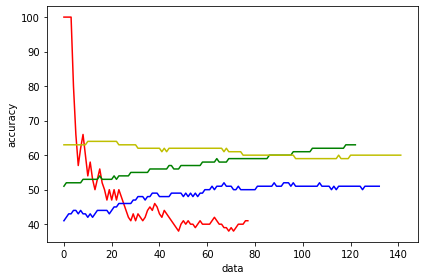


Test set Accuracy: 289/476 (60.7143%)



In [ ]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
!pip install efficientnet_pytorch
import torchvision
from torchvision import transforms
import os
from torch.utils.data import Dataset,DataLoader
import torch
#모델경로
PATH = '/content/drive/MyDrive/project/scalp_weights/'+'aram_model1.pt'   # aram_model6.pt 모델파일 이름 바꿔주기 
#Cuda
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # CUDA (Computed Unified Device Architecture)는 NVIDIA에서 개발한 GPU 개발 툴이다.
#model = model.to(device) # inputs = inputs.to(device) # labels = labels.to(device) # outputs = model(inputs) # 아웃풋 = 모델에디바이스(인풋에디바이스)
#torch.cuda.device(device) : 선택된 장치를 변경하는 context 관리자
#torch.cuda.device 의 파라미터 : device ( torch.device 또는 int ) – 선택할 장치 인덱스, 인수가 음의 정수 또는 None이면 작동X(no-op)
model = torch.load(PATH, map_location=device)
#전처리-트랜스폼 규칙 선언 # model1_train 코드의 validation set 의 트랜스폼 규칙과 동일하게 함
transforms_test = transforms.Compose([                                         # interpolation 보간법 (두점을궤적으로연결하는방법, 알려진 지점 사이의 중간값을 추정하는 방법)
                                        transforms.Resize([int(600), int(600)], interpolation=transforms.InterpolationMode.BOX), 
        #리사이즈할 때 이미지품질에 관여한다
    #InterpolationMode.NEAREST: 0,    최저품질 (디폴트)
    #InterpolationMode.LANCZOS: 1,
    #InterpolationMode.BILINEAR: 2,
    #InterpolationMode.BICUBIC: 3,
    #InterpolationMode.BOX: 4,
    #InterpolationMode.HAMMING: 5     최고품질
        #예를 들어, 어떤 사람이 20살일때 키와 40살에서의 키를 보고 30살에서의 키를 추측하는 것은 interpolation이고 
        #과거 1살때부터 현재 나이까지의 키를 보고 앞으로 10년 후의 키를 예측하는 것은 extrapolation이다. 
        #또한 최근 한달간의 주가 동향을 보고 내일의 주가를 예측하는 것도 extrapolation이며 extrapolation은 
        #interpolation에 비해 훨씬 안정성이 떨어지는 (위험한) 예측 방법이다.
                                        transforms.ToTensor(), #텐서화
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #노말라이즈 정규화
                                      ])
#root 경로 폴더 속 jpg를 전처리, 텐서화 (rood 속에 폴더를 하나 더 만들어서 jpg를 묶어야 함)
testset = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/project/sample/model1sample' ,
                    transform = transforms_test)
#DataLoader를 통해 네트워크에 올리기
from torch.utils.data import Dataset,DataLoader
testloader = DataLoader(testset, batch_size=1, shuffle=False, num_workers=0)
    #데이터 로더는 데이터의 대량 가져오기 또는 내보내기를 위한 클라이언트 응용 프로그램 
    #for data, target in testloader: 에서 data는 데이터의 특징  target은 데이터의 정답값
    ##아웃풋, 로스, 프레딕, 아큐러시
#output_list = []
model.eval() # 평가모드로 전환 # 평가모드와 학습모드의 layer 구성이 다르다
#로스 연산을 위한
import torch.nn.functional as F   # F : 테스트_로스 연산 함수
from tqdm import tqdm # 진행률 표시를 위한 
def aaa() :
    with torch.no_grad(): # 평가할 땐  gradient를 backpropagation 하지 않기 때문에 no grad로 gradient 계산을 막아서 연산 속도를 높인다
            ######
            test_acc_0 = []
            test_acc_1 = []
            test_acc_2 = []
            test_acc_3 = []
            count = 0 # 반복수카운트
            #test_loss = 0
            global correct
            correct = 0
            ######
            for data, target in tqdm(testloader):                                   
                data, target  = data.to(device), target.to(device) 
                output = model(data)   # model1에 데이터를 넣어서 아웃풋 > [a,b,c,d] 각 0,1,2,3 의 확률값 리턴 가장 큰 것이 pred
                #output_list.append(output);
                #test_loss += F.nll_loss(output, target, reduction = 'sum').item()  # test_loss변수에 각 로스를 축적
                pred = output.argmax(dim=1, keepdim=True) # argmax : 리스트에서 최댓값의 인덱스를 뽑아줌 > y값아웃풋인덱
                correct += pred.eq(target.view_as(pred)).sum().item() # accuracy 측정을 위한 변수 # 각 예측이 맞았는지 틀렸는지 correct변수에 축적 맞을 때마다 +1  # # view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  pred.eq(data) : pred와 data가 일치하는지 검사
            ################################
                count += 1
                #모델1샘플파일수 (0,78) (1,133) (2,123) (3,142) 총476
                if count <= 78 :
                    test_acc_0.append( int(( correct / count ) * 100 ) ) # 반복/테스트데이터수별 아큐러시 # ( correct /
                elif count <= 211:
                    test_acc_1.append( int(( correct / count ) * 100 ) )
                elif count <= 334:
                    test_acc_2.append( int(( correct / count ) * 100 ) )
                else  :
                    test_acc_3.append( int(( correct / count ) * 100 ) )
                ##에폭별 아큐러시 그래프 그리기
                #print('best model : %d - %1.f / %.1f'%(best_idx, val_acc[best_idx], val_loss[best_idx]))
    import matplotlib.pyplot as plt
    fig, ax1 = plt.subplots()
    #ax1.plot(train_acc, 'b-') #선그래프Y축
    #ax1.plot(val_acc, 'r-') #선그래프Y축
    ax1.plot(test_acc_0 , 'r-') 
    ax1.plot(test_acc_1 , 'b-')
    ax1.plot(test_acc_2 , 'g-')
    ax1.plot(test_acc_3 , 'y-')
    #plt.plot(best_idx, val_acc[best_idx], 'ro') #벨리셋 아큐러시 최대치 나오는 지점을 점 찍어주기
    ax1.set_xlabel('data')
    #Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('accuracy', color='k')
    ax1.tick_params('y', colors='k')
    #ax2 = ax1.twinx()
    #ax2.plot(train_loss, 'g-')
    #ax2.plot(val_loss, 'k-')
    #plt.plot(best_idx, val_loss[best_idx], 'ro')
    #ax2.set_ylabel('loss', color='k')
    #ax2.tick_params('y', colors='k')
    fig.tight_layout()
    plt.show() #그래프 출력
        ################################
    return output, count, pred,  correct , test_acc_0 , test_acc_1, test_acc_2, test_acc_3
#view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다.
#test_loss /= len(testloader.dataset)  # 로스축적된 로스를 데이터 수(경로안jpg수)로 나누기
#아큐러시 출력 ( :.4f 소수점반올림 )
#print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값
#로스, 아큐러시 출력
#print('\nTest set: Average Loss: {:.4f}, Accuracy: {}/{} ({:.4f}%)\n'.format(test_loss, correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))
aaa()
print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값



# model2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 662/662 [01:17<00:00,  8.54it/s]


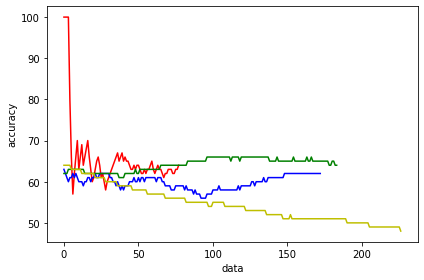


Test set Accuracy: 324/662 (48.9426%)



In [ ]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
!pip install efficientnet_pytorch
import torchvision
from torchvision import transforms
import os
from torch.utils.data import Dataset,DataLoader
import torch
#모델경로
PATH = '/content/drive/MyDrive/project/scalp_weights/'+'aram_model2.pt'   # aram_model6.pt 모델파일 이름 바꿔주기 
#Cuda
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # CUDA (Computed Unified Device Architecture)는 NVIDIA에서 개발한 GPU 개발 툴이다.
#model = model.to(device) # inputs = inputs.to(device) # labels = labels.to(device) # outputs = model(inputs) # 아웃풋 = 모델에디바이스(인풋에디바이스)
#torch.cuda.device(device) : 선택된 장치를 변경하는 context 관리자
#torch.cuda.device 의 파라미터 : device ( torch.device 또는 int ) – 선택할 장치 인덱스, 인수가 음의 정수 또는 None이면 작동X(no-op)
model = torch.load(PATH, map_location=device)
#전처리-트랜스폼 규칙 선언 # model1_train 코드의 validation set 의 트랜스폼 규칙과 동일하게 함
transforms_test = transforms.Compose([                                         # interpolation 보간법 (두점을궤적으로연결하는방법, 알려진 지점 사이의 중간값을 추정하는 방법)
                                        transforms.Resize([int(600), int(600)], interpolation=transforms.InterpolationMode.BOX), 
        #리사이즈할 때 이미지품질에 관여한다
    #InterpolationMode.NEAREST: 0,    최저품질 (디폴트)
    #InterpolationMode.LANCZOS: 1,
    #InterpolationMode.BILINEAR: 2,
    #InterpolationMode.BICUBIC: 3,
    #InterpolationMode.BOX: 4,
    #InterpolationMode.HAMMING: 5     최고품질
        #예를 들어, 어떤 사람이 20살일때 키와 40살에서의 키를 보고 30살에서의 키를 추측하는 것은 interpolation이고 
        #과거 1살때부터 현재 나이까지의 키를 보고 앞으로 10년 후의 키를 예측하는 것은 extrapolation이다. 
        #또한 최근 한달간의 주가 동향을 보고 내일의 주가를 예측하는 것도 extrapolation이며 extrapolation은 
        #interpolation에 비해 훨씬 안정성이 떨어지는 (위험한) 예측 방법이다.
                                        transforms.ToTensor(), #텐서화
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #노말라이즈 정규화
                                      ])
#root 경로 폴더 속 jpg를 전처리, 텐서화 (rood 속에 폴더를 하나 더 만들어서 jpg를 묶어야 함)
testset = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/project/sample/model2sample' ,
                    transform = transforms_test)
#DataLoader를 통해 네트워크에 올리기
from torch.utils.data import Dataset,DataLoader
testloader = DataLoader(testset, batch_size=1, shuffle=False, num_workers=0)
    #데이터 로더는 데이터의 대량 가져오기 또는 내보내기를 위한 클라이언트 응용 프로그램 
    #for data, target in testloader: 에서 data는 데이터의 특징  target은 데이터의 정답값
    ##아웃풋, 로스, 프레딕, 아큐러시
#output_list = []
model.eval() # 평가모드로 전환 # 평가모드와 학습모드의 layer 구성이 다르다
#로스 연산을 위한
import torch.nn.functional as F   # F : 테스트_로스 연산 함수
from tqdm import tqdm # 진행률 표시를 위한 
def aaa() :
    with torch.no_grad(): # 평가할 땐  gradient를 backpropagation 하지 않기 때문에 no grad로 gradient 계산을 막아서 연산 속도를 높인다
            ######
            test_acc_0 = []
            test_acc_1 = []
            test_acc_2 = []
            test_acc_3 = []
            count = 0 # 반복수카운트
            #test_loss = 0
            global correct
            correct = 0
            ######
            for data, target in tqdm(testloader):                                   
                data, target  = data.to(device), target.to(device) 
                output = model(data)   # model1에 데이터를 넣어서 아웃풋 > [a,b,c,d] 각 0,1,2,3 의 확률값 리턴 가장 큰 것이 pred
                #output_list.append(output);
                #test_loss += F.nll_loss(output, target, reduction = 'sum').item()  # test_loss변수에 각 로스를 축적
                pred = output.argmax(dim=1, keepdim=True) # argmax : 리스트에서 최댓값의 인덱스를 뽑아줌 > y값아웃풋인덱
                correct += pred.eq(target.view_as(pred)).sum().item() # accuracy 측정을 위한 변수 # 각 예측이 맞았는지 틀렸는지 correct변수에 축적 맞을 때마다 +1  # # view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  pred.eq(data) : pred와 data가 일치하는지 검사
            ################################
                count += 1
                #모델2 78 173 184
                if count <= 78 :
                    test_acc_0.append( int(( correct / count ) * 100 ) ) # 반복/테스트데이터수별 아큐러시 # ( correct /
                elif count <= 251:
                    test_acc_1.append( int(( correct / count ) * 100 ) )
                elif count <= 435:
                    test_acc_2.append( int(( correct / count ) * 100 ) )
                else  :
                    test_acc_3.append( int(( correct / count ) * 100 ) )
                ##에폭별 아큐러시 그래프 그리기
                #print('best model : %d - %1.f / %.1f'%(best_idx, val_acc[best_idx], val_loss[best_idx]))
    import matplotlib.pyplot as plt
    fig, ax1 = plt.subplots()
    #ax1.plot(train_acc, 'b-') #선그래프Y축
    #ax1.plot(val_acc, 'r-') #선그래프Y축
    ax1.plot(test_acc_0 , 'r-') 
    ax1.plot(test_acc_1 , 'b-')
    ax1.plot(test_acc_2 , 'g-')
    ax1.plot(test_acc_3 , 'y-')
    #plt.plot(best_idx, val_acc[best_idx], 'ro') #벨리셋 아큐러시 최대치 나오는 지점을 점 찍어주기
    ax1.set_xlabel('data')
    #Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('accuracy', color='k')
    ax1.tick_params('y', colors='k')
    #ax2 = ax1.twinx()
    #ax2.plot(train_loss, 'g-')
    #ax2.plot(val_loss, 'k-')
    #plt.plot(best_idx, val_loss[best_idx], 'ro')
    #ax2.set_ylabel('loss', color='k')
    #ax2.tick_params('y', colors='k')
    fig.tight_layout()
    plt.show() #그래프 출력
        ################################
    return output, count, pred,  correct
#view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다.
#test_loss /= len(testloader.dataset)  # 로스축적된 로스를 데이터 수(경로안jpg수)로 나누기
#아큐러시 출력 ( :.4f 소수점반올림 )
#print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값
#로스, 아큐러시 출력
#print('\nTest set: Average Loss: {:.4f}, Accuracy: {}/{} ({:.4f}%)\n'.format(test_loss, correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))
aaa()
print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값

# model3

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 718/718 [01:28<00:00,  8.12it/s]


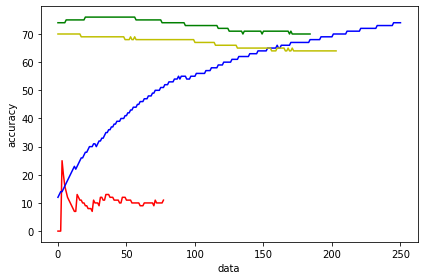


Test set Accuracy: 461/718 (64.2061%)



In [ ]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
!pip install efficientnet_pytorch
import torchvision
from torchvision import transforms
import os
from torch.utils.data import Dataset,DataLoader
import torch
#모델경로
PATH = '/content/drive/MyDrive/project/scalp_weights/'+'aram_model3.pt'   # aram_model6.pt 모델파일 이름 바꿔주기 
#Cuda
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # CUDA (Computed Unified Device Architecture)는 NVIDIA에서 개발한 GPU 개발 툴이다.
#model = model.to(device) # inputs = inputs.to(device) # labels = labels.to(device) # outputs = model(inputs) # 아웃풋 = 모델에디바이스(인풋에디바이스)
#torch.cuda.device(device) : 선택된 장치를 변경하는 context 관리자
#torch.cuda.device 의 파라미터 : device ( torch.device 또는 int ) – 선택할 장치 인덱스, 인수가 음의 정수 또는 None이면 작동X(no-op)
model = torch.load(PATH, map_location=device)
#전처리-트랜스폼 규칙 선언 # model1_train 코드의 validation set 의 트랜스폼 규칙과 동일하게 함
transforms_test = transforms.Compose([                                         # interpolation 보간법 (두점을궤적으로연결하는방법, 알려진 지점 사이의 중간값을 추정하는 방법)
                                        transforms.Resize([int(600), int(600)], interpolation=transforms.InterpolationMode.BOX), 
        #리사이즈할 때 이미지품질에 관여한다
    #InterpolationMode.NEAREST: 0,    최저품질 (디폴트)
    #InterpolationMode.LANCZOS: 1,
    #InterpolationMode.BILINEAR: 2,
    #InterpolationMode.BICUBIC: 3,
    #InterpolationMode.BOX: 4,
    #InterpolationMode.HAMMING: 5     최고품질
        #예를 들어, 어떤 사람이 20살일때 키와 40살에서의 키를 보고 30살에서의 키를 추측하는 것은 interpolation이고 
        #과거 1살때부터 현재 나이까지의 키를 보고 앞으로 10년 후의 키를 예측하는 것은 extrapolation이다. 
        #또한 최근 한달간의 주가 동향을 보고 내일의 주가를 예측하는 것도 extrapolation이며 extrapolation은 
        #interpolation에 비해 훨씬 안정성이 떨어지는 (위험한) 예측 방법이다.
                                        transforms.ToTensor(), #텐서화
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #노말라이즈 정규화
                                      ])
#root 경로 폴더 속 jpg를 전처리, 텐서화 (rood 속에 폴더를 하나 더 만들어서 jpg를 묶어야 함)
testset = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/project/sample/model3sample' ,
                    transform = transforms_test)
#DataLoader를 통해 네트워크에 올리기
from torch.utils.data import Dataset,DataLoader
testloader = DataLoader(testset, batch_size=1, shuffle=False, num_workers=0)
    #데이터 로더는 데이터의 대량 가져오기 또는 내보내기를 위한 클라이언트 응용 프로그램 
    #for data, target in testloader: 에서 data는 데이터의 특징  target은 데이터의 정답값
    ##아웃풋, 로스, 프레딕, 아큐러시
#output_list = []
model.eval() # 평가모드로 전환 # 평가모드와 학습모드의 layer 구성이 다르다
#로스 연산을 위한
import torch.nn.functional as F   # F : 테스트_로스 연산 함수
from tqdm import tqdm # 진행률 표시를 위한 
def aaa() :
    with torch.no_grad(): # 평가할 땐  gradient를 backpropagation 하지 않기 때문에 no grad로 gradient 계산을 막아서 연산 속도를 높인다
            ######
            test_acc_0 = []
            test_acc_1 = []
            test_acc_2 = []
            test_acc_3 = []
            count = 0 # 반복수카운트
            #test_loss = 0
            global correct
            correct = 0
            ######
            for data, target in tqdm(testloader):                                   
                data, target  = data.to(device), target.to(device) 
                output = model(data)   # model1에 데이터를 넣어서 아웃풋 > [a,b,c,d] 각 0,1,2,3 의 확률값 리턴 가장 큰 것이 pred
                #output_list.append(output);
                #test_loss += F.nll_loss(output, target, reduction = 'sum').item()  # test_loss변수에 각 로스를 축적
                pred = output.argmax(dim=1, keepdim=True) # argmax : 리스트에서 최댓값의 인덱스를 뽑아줌 > y값아웃풋인덱
                correct += pred.eq(target.view_as(pred)).sum().item() # accuracy 측정을 위한 변수 # 각 예측이 맞았는지 틀렸는지 correct변수에 축적 맞을 때마다 +1  # # view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  pred.eq(data) : pred와 data가 일치하는지 검사
            ################################
                count += 1
                #모델2 78 283 185
                if count <= 78 :
                    test_acc_0.append( int(( correct / count ) * 100 ) ) # 반복/테스트데이터수별 아큐러시 # ( correct /
                elif count <= 329:
                    test_acc_1.append( int(( correct / count ) * 100 ) )
                elif count <= 514:
                    test_acc_2.append( int(( correct / count ) * 100 ) )
                else  :
                    test_acc_3.append( int(( correct / count ) * 100 ) )
                ##에폭별 아큐러시 그래프 그리기
                #print('best model : %d - %1.f / %.1f'%(best_idx, val_acc[best_idx], val_loss[best_idx]))
    import matplotlib.pyplot as plt
    fig, ax1 = plt.subplots()
    #ax1.plot(train_acc, 'b-') #선그래프Y축
    #ax1.plot(val_acc, 'r-') #선그래프Y축
    ax1.plot(test_acc_0 , 'r-') 
    ax1.plot(test_acc_1 , 'b-')
    ax1.plot(test_acc_2 , 'g-')
    ax1.plot(test_acc_3 , 'y-')
    #plt.plot(best_idx, val_acc[best_idx], 'ro') #벨리셋 아큐러시 최대치 나오는 지점을 점 찍어주기
    ax1.set_xlabel('data')
    #Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('accuracy', color='k')
    ax1.tick_params('y', colors='k')
    #ax2 = ax1.twinx()
    #ax2.plot(train_loss, 'g-')
    #ax2.plot(val_loss, 'k-')
    #plt.plot(best_idx, val_loss[best_idx], 'ro')
    #ax2.set_ylabel('loss', color='k')
    #ax2.tick_params('y', colors='k')
    fig.tight_layout()
    plt.show() #그래프 출력
        ################################
    return output, count, pred,  correct
#view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다.
#test_loss /= len(testloader.dataset)  # 로스축적된 로스를 데이터 수(경로안jpg수)로 나누기
#아큐러시 출력 ( :.4f 소수점반올림 )
#print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값
#로스, 아큐러시 출력
#print('\nTest set: Average Loss: {:.4f}, Accuracy: {}/{} ({:.4f}%)\n'.format(test_loss, correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))
aaa()
print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값

# model4

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 394/394 [00:51<00:00,  7.61it/s]


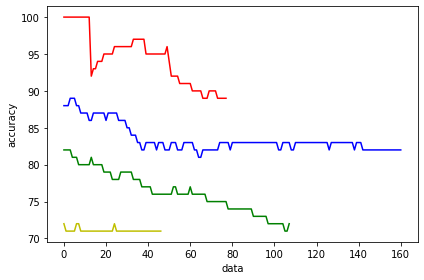


Test set Accuracy: 281/394 (71.3198%)



In [ ]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
!pip install efficientnet_pytorch
import torchvision
from torchvision import transforms
import os
from torch.utils.data import Dataset,DataLoader
import torch
#모델경로
PATH = '/content/drive/MyDrive/project/scalp_weights/'+'aram_model4.pt'   # aram_model6.pt 모델파일 이름 바꿔주기 
#Cuda
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # CUDA (Computed Unified Device Architecture)는 NVIDIA에서 개발한 GPU 개발 툴이다.
#model = model.to(device) # inputs = inputs.to(device) # labels = labels.to(device) # outputs = model(inputs) # 아웃풋 = 모델에디바이스(인풋에디바이스)
#torch.cuda.device(device) : 선택된 장치를 변경하는 context 관리자
#torch.cuda.device 의 파라미터 : device ( torch.device 또는 int ) – 선택할 장치 인덱스, 인수가 음의 정수 또는 None이면 작동X(no-op)
model = torch.load(PATH, map_location=device)
#전처리-트랜스폼 규칙 선언 # model1_train 코드의 validation set 의 트랜스폼 규칙과 동일하게 함
transforms_test = transforms.Compose([                                         # interpolation 보간법 (두점을궤적으로연결하는방법, 알려진 지점 사이의 중간값을 추정하는 방법)
                                        transforms.Resize([int(600), int(600)], interpolation=transforms.InterpolationMode.BOX), 
        #리사이즈할 때 이미지품질에 관여한다
    #InterpolationMode.NEAREST: 0,    최저품질 (디폴트)
    #InterpolationMode.LANCZOS: 1,
    #InterpolationMode.BILINEAR: 2,
    #InterpolationMode.BICUBIC: 3,
    #InterpolationMode.BOX: 4,
    #InterpolationMode.HAMMING: 5     최고품질
        #예를 들어, 어떤 사람이 20살일때 키와 40살에서의 키를 보고 30살에서의 키를 추측하는 것은 interpolation이고 
        #과거 1살때부터 현재 나이까지의 키를 보고 앞으로 10년 후의 키를 예측하는 것은 extrapolation이다. 
        #또한 최근 한달간의 주가 동향을 보고 내일의 주가를 예측하는 것도 extrapolation이며 extrapolation은 
        #interpolation에 비해 훨씬 안정성이 떨어지는 (위험한) 예측 방법이다.
                                        transforms.ToTensor(), #텐서화
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #노말라이즈 정규화
                                      ])
#root 경로 폴더 속 jpg를 전처리, 텐서화 (rood 속에 폴더를 하나 더 만들어서 jpg를 묶어야 함)
testset = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/project/sample/model4sample' ,
                    transform = transforms_test)
#DataLoader를 통해 네트워크에 올리기
from torch.utils.data import Dataset,DataLoader
testloader = DataLoader(testset, batch_size=1, shuffle=False, num_workers=0)
    #데이터 로더는 데이터의 대량 가져오기 또는 내보내기를 위한 클라이언트 응용 프로그램 
    #for data, target in testloader: 에서 data는 데이터의 특징  target은 데이터의 정답값
    ##아웃풋, 로스, 프레딕, 아큐러시
#output_list = []
model.eval() # 평가모드로 전환 # 평가모드와 학습모드의 layer 구성이 다르다
#로스 연산을 위한
import torch.nn.functional as F   # F : 테스트_로스 연산 함수
from tqdm import tqdm # 진행률 표시를 위한 
def aaa() :
    with torch.no_grad(): # 평가할 땐  gradient를 backpropagation 하지 않기 때문에 no grad로 gradient 계산을 막아서 연산 속도를 높인다
            ######
            test_acc_0 = []
            test_acc_1 = []
            test_acc_2 = []
            test_acc_3 = []
            count = 0 # 반복수카운트
            #test_loss = 0
            global correct
            correct = 0
            ######
            for data, target in tqdm(testloader):                                   
                data, target  = data.to(device), target.to(device) 
                output = model(data)   # model1에 데이터를 넣어서 아웃풋 > [a,b,c,d] 각 0,1,2,3 의 확률값 리턴 가장 큰 것이 pred
                #output_list.append(output);
                #test_loss += F.nll_loss(output, target, reduction = 'sum').item()  # test_loss변수에 각 로스를 축적
                pred = output.argmax(dim=1, keepdim=True) # argmax : 리스트에서 최댓값의 인덱스를 뽑아줌 > y값아웃풋인덱
                correct += pred.eq(target.view_as(pred)).sum().item() # accuracy 측정을 위한 변수 # 각 예측이 맞았는지 틀렸는지 correct변수에 축적 맞을 때마다 +1  # # view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  pred.eq(data) : pred와 data가 일치하는지 검사
            ################################
                count += 1
                #모델2 78 161 108
                if count <= 78 :
                    test_acc_0.append( int(( correct / count ) * 100 ) ) # 반복/테스트데이터수별 아큐러시 # ( correct /
                elif count <= 239:
                    test_acc_1.append( int(( correct / count ) * 100 ) )
                elif count <= 347:
                    test_acc_2.append( int(( correct / count ) * 100 ) )
                else  :
                    test_acc_3.append( int(( correct / count ) * 100 ) )
                ##에폭별 아큐러시 그래프 그리기
                #print('best model : %d - %1.f / %.1f'%(best_idx, val_acc[best_idx], val_loss[best_idx]))
    import matplotlib.pyplot as plt
    fig, ax1 = plt.subplots()
    #ax1.plot(train_acc, 'b-') #선그래프Y축
    #ax1.plot(val_acc, 'r-') #선그래프Y축
    ax1.plot(test_acc_0 , 'r-') 
    ax1.plot(test_acc_1 , 'b-')
    ax1.plot(test_acc_2 , 'g-')
    ax1.plot(test_acc_3 , 'y-')
    #plt.plot(best_idx, val_acc[best_idx], 'ro') #벨리셋 아큐러시 최대치 나오는 지점을 점 찍어주기
    ax1.set_xlabel('data')
    #Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('accuracy', color='k')
    ax1.tick_params('y', colors='k')
    #ax2 = ax1.twinx()
    #ax2.plot(train_loss, 'g-')
    #ax2.plot(val_loss, 'k-')
    #plt.plot(best_idx, val_loss[best_idx], 'ro')
    #ax2.set_ylabel('loss', color='k')
    #ax2.tick_params('y', colors='k')
    fig.tight_layout()
    plt.show() #그래프 출력
        ################################
    return output, count, pred,  correct
#view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다.
#test_loss /= len(testloader.dataset)  # 로스축적된 로스를 데이터 수(경로안jpg수)로 나누기
#아큐러시 출력 ( :.4f 소수점반올림 )
#print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값
#로스, 아큐러시 출력
#print('\nTest set: Average Loss: {:.4f}, Accuracy: {}/{} ({:.4f}%)\n'.format(test_loss, correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))
aaa()
print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값

#model5

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 620/620 [01:17<00:00,  8.04it/s]


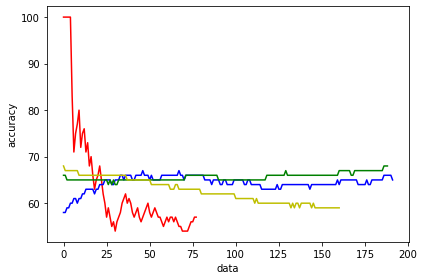


Test set Accuracy: 370/620 (59.6774%)



In [ ]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
!pip install efficientnet_pytorch
import torchvision
from torchvision import transforms
import os
from torch.utils.data import Dataset,DataLoader
import torch
#모델경로
PATH = '/content/drive/MyDrive/project/scalp_weights/'+'aram_model5.pt'   # aram_model6.pt 모델파일 이름 바꿔주기 
#Cuda
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # CUDA (Computed Unified Device Architecture)는 NVIDIA에서 개발한 GPU 개발 툴이다.
#model = model.to(device) # inputs = inputs.to(device) # labels = labels.to(device) # outputs = model(inputs) # 아웃풋 = 모델에디바이스(인풋에디바이스)
#torch.cuda.device(device) : 선택된 장치를 변경하는 context 관리자
#torch.cuda.device 의 파라미터 : device ( torch.device 또는 int ) – 선택할 장치 인덱스, 인수가 음의 정수 또는 None이면 작동X(no-op)
model = torch.load(PATH, map_location=device)
#전처리-트랜스폼 규칙 선언 # model1_train 코드의 validation set 의 트랜스폼 규칙과 동일하게 함
transforms_test = transforms.Compose([                                         # interpolation 보간법 (두점을궤적으로연결하는방법, 알려진 지점 사이의 중간값을 추정하는 방법)
                                        transforms.Resize([int(600), int(600)], interpolation=transforms.InterpolationMode.BOX), 
        #리사이즈할 때 이미지품질에 관여한다
    #InterpolationMode.NEAREST: 0,    최저품질 (디폴트)
    #InterpolationMode.LANCZOS: 1,
    #InterpolationMode.BILINEAR: 2,
    #InterpolationMode.BICUBIC: 3,
    #InterpolationMode.BOX: 4,
    #InterpolationMode.HAMMING: 5     최고품질
        #예를 들어, 어떤 사람이 20살일때 키와 40살에서의 키를 보고 30살에서의 키를 추측하는 것은 interpolation이고 
        #과거 1살때부터 현재 나이까지의 키를 보고 앞으로 10년 후의 키를 예측하는 것은 extrapolation이다. 
        #또한 최근 한달간의 주가 동향을 보고 내일의 주가를 예측하는 것도 extrapolation이며 extrapolation은 
        #interpolation에 비해 훨씬 안정성이 떨어지는 (위험한) 예측 방법이다.
                                        transforms.ToTensor(), #텐서화
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #노말라이즈 정규화
                                      ])
#root 경로 폴더 속 jpg를 전처리, 텐서화 (rood 속에 폴더를 하나 더 만들어서 jpg를 묶어야 함)
testset = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/project/sample/model5sample' ,
                    transform = transforms_test)
#DataLoader를 통해 네트워크에 올리기
from torch.utils.data import Dataset,DataLoader
testloader = DataLoader(testset, batch_size=1, shuffle=False, num_workers=0)
    #데이터 로더는 데이터의 대량 가져오기 또는 내보내기를 위한 클라이언트 응용 프로그램 
    #for data, target in testloader: 에서 data는 데이터의 특징  target은 데이터의 정답값
    ##아웃풋, 로스, 프레딕, 아큐러시
#output_list = []
model.eval() # 평가모드로 전환 # 평가모드와 학습모드의 layer 구성이 다르다
#로스 연산을 위한
import torch.nn.functional as F   # F : 테스트_로스 연산 함수
from tqdm import tqdm # 진행률 표시를 위한 
def aaa() :
    with torch.no_grad(): # 평가할 땐  gradient를 backpropagation 하지 않기 때문에 no grad로 gradient 계산을 막아서 연산 속도를 높인다
            ######
            test_acc_0 = []
            test_acc_1 = []
            test_acc_2 = []
            test_acc_3 = []
            count = 0 # 반복수카운트
            #test_loss = 0
            global correct
            correct = 0
            ######
            for data, target in tqdm(testloader):                                   
                data, target  = data.to(device), target.to(device) 
                output = model(data)   # model1에 데이터를 넣어서 아웃풋 > [a,b,c,d] 각 0,1,2,3 의 확률값 리턴 가장 큰 것이 pred
                #output_list.append(output);
                #test_loss += F.nll_loss(output, target, reduction = 'sum').item()  # test_loss변수에 각 로스를 축적
                pred = output.argmax(dim=1, keepdim=True) # argmax : 리스트에서 최댓값의 인덱스를 뽑아줌 > y값아웃풋인덱
                correct += pred.eq(target.view_as(pred)).sum().item() # accuracy 측정을 위한 변수 # 각 예측이 맞았는지 틀렸는지 correct변수에 축적 맞을 때마다 +1  # # view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  pred.eq(data) : pred와 data가 일치하는지 검사
            ################################
                count += 1
                #모델2 78 192 189
                if count <= 78 :
                    test_acc_0.append( int(( correct / count ) * 100 ) ) # 반복/테스트데이터수별 아큐러시 # ( correct /
                elif count <= 270:
                    test_acc_1.append( int(( correct / count ) * 100 ) )
                elif count <= 459:
                    test_acc_2.append( int(( correct / count ) * 100 ) )
                else  :
                    test_acc_3.append( int(( correct / count ) * 100 ) )
                ##에폭별 아큐러시 그래프 그리기
                #print('best model : %d - %1.f / %.1f'%(best_idx, val_acc[best_idx], val_loss[best_idx]))
    import matplotlib.pyplot as plt
    fig, ax1 = plt.subplots()
    #ax1.plot(train_acc, 'b-') #선그래프Y축
    #ax1.plot(val_acc, 'r-') #선그래프Y축
    ax1.plot(test_acc_0 , 'r-') 
    ax1.plot(test_acc_1 , 'b-')
    ax1.plot(test_acc_2 , 'g-')
    ax1.plot(test_acc_3 , 'y-')
    #plt.plot(best_idx, val_acc[best_idx], 'ro') #벨리셋 아큐러시 최대치 나오는 지점을 점 찍어주기
    ax1.set_xlabel('data')
    #Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('accuracy', color='k')
    ax1.tick_params('y', colors='k')
    #ax2 = ax1.twinx()
    #ax2.plot(train_loss, 'g-')
    #ax2.plot(val_loss, 'k-')
    #plt.plot(best_idx, val_loss[best_idx], 'ro')
    #ax2.set_ylabel('loss', color='k')
    #ax2.tick_params('y', colors='k')
    fig.tight_layout()
    plt.show() #그래프 출력
        ################################
    return output, count, pred,  correct
#view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다.
#test_loss /= len(testloader.dataset)  # 로스축적된 로스를 데이터 수(경로안jpg수)로 나누기
#아큐러시 출력 ( :.4f 소수점반올림 )
#print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값
#로스, 아큐러시 출력
#print('\nTest set: Average Loss: {:.4f}, Accuracy: {}/{} ({:.4f}%)\n'.format(test_loss, correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))
aaa()
print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값

# model6

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 1154/1154 [02:16<00:00,  8.48it/s]


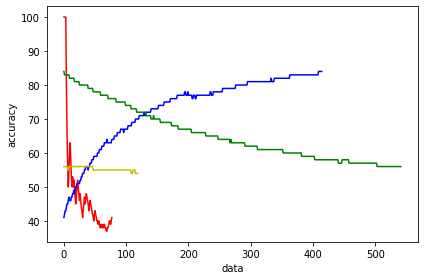


Test set Accuracy: 633/1154 (54.8527%)



In [ ]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
!pip install efficientnet_pytorch
import torchvision
from torchvision import transforms
import os
from torch.utils.data import Dataset,DataLoader
import torch
#모델경로
PATH = '/content/drive/MyDrive/project/scalp_weights/'+'aram_model6.pt'   # aram_model6.pt 모델파일 이름 바꿔주기 
#Cuda
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # CUDA (Computed Unified Device Architecture)는 NVIDIA에서 개발한 GPU 개발 툴이다.
#model = model.to(device) # inputs = inputs.to(device) # labels = labels.to(device) # outputs = model(inputs) # 아웃풋 = 모델에디바이스(인풋에디바이스)
#torch.cuda.device(device) : 선택된 장치를 변경하는 context 관리자
#torch.cuda.device 의 파라미터 : device ( torch.device 또는 int ) – 선택할 장치 인덱스, 인수가 음의 정수 또는 None이면 작동X(no-op)
model = torch.load(PATH, map_location=device)
#전처리-트랜스폼 규칙 선언 # model1_train 코드의 validation set 의 트랜스폼 규칙과 동일하게 함
transforms_test = transforms.Compose([                                         # interpolation 보간법 (두점을궤적으로연결하는방법, 알려진 지점 사이의 중간값을 추정하는 방법)
                                        transforms.Resize([int(600), int(600)], interpolation=transforms.InterpolationMode.BOX), 
        #리사이즈할 때 이미지품질에 관여한다
    #InterpolationMode.NEAREST: 0,    최저품질 (디폴트)
    #InterpolationMode.LANCZOS: 1,
    #InterpolationMode.BILINEAR: 2,
    #InterpolationMode.BICUBIC: 3,
    #InterpolationMode.BOX: 4,
    #InterpolationMode.HAMMING: 5     최고품질
        #예를 들어, 어떤 사람이 20살일때 키와 40살에서의 키를 보고 30살에서의 키를 추측하는 것은 interpolation이고 
        #과거 1살때부터 현재 나이까지의 키를 보고 앞으로 10년 후의 키를 예측하는 것은 extrapolation이다. 
        #또한 최근 한달간의 주가 동향을 보고 내일의 주가를 예측하는 것도 extrapolation이며 extrapolation은 
        #interpolation에 비해 훨씬 안정성이 떨어지는 (위험한) 예측 방법이다.
                                        transforms.ToTensor(), #텐서화
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #노말라이즈 정규화
                                      ])
#root 경로 폴더 속 jpg를 전처리, 텐서화 (rood 속에 폴더를 하나 더 만들어서 jpg를 묶어야 함)
testset = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/project/sample/model6sample' ,
                    transform = transforms_test)
#DataLoader를 통해 네트워크에 올리기
from torch.utils.data import Dataset,DataLoader
testloader = DataLoader(testset, batch_size=1, shuffle=False, num_workers=0)
    #데이터 로더는 데이터의 대량 가져오기 또는 내보내기를 위한 클라이언트 응용 프로그램 
    #for data, target in testloader: 에서 data는 데이터의 특징  target은 데이터의 정답값
    ##아웃풋, 로스, 프레딕, 아큐러시
#output_list = []
model.eval() # 평가모드로 전환 # 평가모드와 학습모드의 layer 구성이 다르다
#로스 연산을 위한
import torch.nn.functional as F   # F : 테스트_로스 연산 함수
from tqdm import tqdm # 진행률 표시를 위한 
def aaa() :
    with torch.no_grad(): # 평가할 땐  gradient를 backpropagation 하지 않기 때문에 no grad로 gradient 계산을 막아서 연산 속도를 높인다
            ######
            test_acc_0 = []
            test_acc_1 = []
            test_acc_2 = []
            test_acc_3 = []
            count = 0 # 반복수카운트
            #test_loss = 0
            global correct
            correct = 0
            ######
            for data, target in tqdm(testloader):                                   
                data, target  = data.to(device), target.to(device) 
                output = model(data)   # model1에 데이터를 넣어서 아웃풋 > [a,b,c,d] 각 0,1,2,3 의 확률값 리턴 가장 큰 것이 pred
                #output_list.append(output);
                #test_loss += F.nll_loss(output, target, reduction = 'sum').item()  # test_loss변수에 각 로스를 축적
                pred = output.argmax(dim=1, keepdim=True) # argmax : 리스트에서 최댓값의 인덱스를 뽑아줌 > y값아웃풋인덱
                correct += pred.eq(target.view_as(pred)).sum().item() # accuracy 측정을 위한 변수 # 각 예측이 맞았는지 틀렸는지 correct변수에 축적 맞을 때마다 +1  # # view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다. #  pred.eq(data) : pred와 data가 일치하는지 검사
            ################################
                count += 1
                #모델2 78 415 542
                if count <= 78 :
                    test_acc_0.append( int(( correct / count ) * 100 ) ) # 반복/테스트데이터수별 아큐러시 # ( correct /
                elif count <= 493:
                    test_acc_1.append( int(( correct / count ) * 100 ) )
                elif count <= 1035:
                    test_acc_2.append( int(( correct / count ) * 100 ) )
                else  :
                    test_acc_3.append( int(( correct / count ) * 100 ) )
                ##에폭별 아큐러시 그래프 그리기
                #print('best model : %d - %1.f / %.1f'%(best_idx, val_acc[best_idx], val_loss[best_idx]))
    import matplotlib.pyplot as plt
    fig, ax1 = plt.subplots()
    #ax1.plot(train_acc, 'b-') #선그래프Y축
    #ax1.plot(val_acc, 'r-') #선그래프Y축
    ax1.plot(test_acc_0 , 'r-') 
    ax1.plot(test_acc_1 , 'b-')
    ax1.plot(test_acc_2 , 'g-')
    ax1.plot(test_acc_3 , 'y-')
    #plt.plot(best_idx, val_acc[best_idx], 'ro') #벨리셋 아큐러시 최대치 나오는 지점을 점 찍어주기
    ax1.set_xlabel('data')
    #Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('accuracy', color='k')
    ax1.tick_params('y', colors='k')
    #ax2 = ax1.twinx()
    #ax2.plot(train_loss, 'g-')
    #ax2.plot(val_loss, 'k-')
    #plt.plot(best_idx, val_loss[best_idx], 'ro')
    #ax2.set_ylabel('loss', color='k')
    #ax2.tick_params('y', colors='k')
    fig.tight_layout()
    plt.show() #그래프 출력
        ################################
    return output, count, pred,  correct
#view_as() 함수는 target 텐서를 view_as() 함수 안에 들어가는 인수(pred)의 모양대로 다시 정렬한다.
#test_loss /= len(testloader.dataset)  # 로스축적된 로스를 데이터 수(경로안jpg수)로 나누기
#아큐러시 출력 ( :.4f 소수점반올림 )
#print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값
#로스, 아큐러시 출력
#print('\nTest set: Average Loss: {:.4f}, Accuracy: {}/{} ({:.4f}%)\n'.format(test_loss, correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))
aaa()
print('\nTest set Accuracy: {}/{} ({:.4f}%)\n'.format(correct, len(testloader.dataset), 100. * correct / len(testloader.dataset)))  # 축적된 예측값을 데이터 개수로 나누기 *100 > 확률%값

In [ ]:
# 최종 모델 벨리셋 /  테스트셋 정확도

# 모델1
model1(미세각질) : 모델 생성 완료(epoch 15회 best val score : 63.4%)
train/val : 12739/3639
100%|██████████| 238/238 [03:01<00:00,  1.31it/s]
Test set: Average Loss: -1.9017, Accuracy: 289/476 (60.7143%)

# 모델2
model2(피지과다) : 모델 생성 완료(epoch 2회 best val score : 57.6%)
train/val : 56826/16236
100%|██████████| 662/662 [01:17<00:00,  8.54it/s]
Test set Accuracy: 324/662 (48.9426%)

# 모델3
model3(모낭사이홍반) : 모델 생성 완료(epoch 5회 best val score : 78.4)
train/val : 47726/13635
100%|██████████| 359/359 [03:24<00:00,  1.76it/s]
Test set: Average Loss: -2.2255, Accuracy: 461/718 (64.2061%)

# 모델4
model4(모낭홍반농포) : 모델 생성 완료(epoch 50회 best val score : 72.4)
train/val : 3750/1070
100%|██████████| 197/197 [01:32<00:00,  2.12it/s]
Test set: Average Loss: -3.4693, Accuracy: 281/394 (71.3198%)

# 모델5
model5(비듬) : 모델 생성 완료(epoch 5회 best val score : 73.4)
trian/val : 28873/8248
100%|██████████| 310/310 [02:31<00:00,  2.05it/s]
Test set: Average Loss: -2.0950, Accuracy: 370/620 (59.6774%)

# 모델6
model6(탈모) : 모델 생성 완료(epoch 8회(4회×2) best val score : 74.7)
trian/val : 18513/5288
100%|██████████| 577/577 [05:12<00:00,  1.85it/s]
Test set: Average Loss: -1.3145, Accuracy: 633/1154 (54.8527%)